# TASK: 3 - IRIS CLASSIFICATION PROJECT

#### The Iris flower dataset encompasses three distinct species: setosa, versicolor, and virginica.
#### • These species are discernible through specific measurements. Imagine possessing measurements of Iris flowers categorized by their distinct species.
#### • The goal is to train a machine learning model capable of learning from these measurements and proficiently categorizing Iris flowers into their corresponding species.
#### • Employ the Iris dataset to construct a model adept at classifying Iris flowers into distinct species based on their sepal and petal measurements.
#### • This dataset serves as a prevalent choice for initial classification tasks, making it ideal for introductory learning experiences

### Importing all the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import os
import warnings
warnings.filterwarnings("ignore")
import mysql
from mysql import connector
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from scipy import stats
import math
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix,classification_report,roc_auc_score
from sklearn.model_selection import cross_val_score

In [2]:
data=pd.read_csv("IRIS.csv")
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Basic Checks

In [3]:
data.head() # displays initial 5 rows

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.tail() # displays final 5 rows

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
data.shape # to get the number of rows and columns

(150, 5)

##### Dataset contains 150 rows and 5 columns

In [6]:
data.describe() # Statistical information about numerical data

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data.describe(include="O") # Statistical information about categorical data

,species
count,150
unique,3
top,Iris-setosa
freq,50


In [8]:
data.info() # Quick summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
data.duplicated().sum() # checking for duplicated records

3

In [10]:
#dropping duplicated records
data.drop_duplicates(inplace=True)

In [11]:
data.dtypes # to check the datatypes of columns

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [12]:
## Counting the tagert variabe for each class
data.species.value_counts() # indicates imbalanced dataset

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: species, dtype: int64

## EDA (Exploratory Data Analysis)

### Univariate Analysis

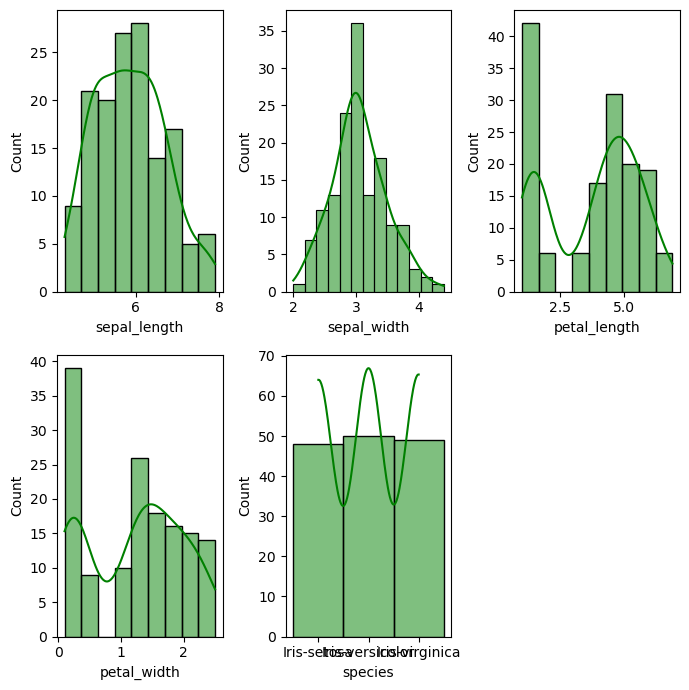

In [13]:
plt.figure(figsize=(7,7))
plotnumber=1 # initializing number of plots
for i in data:
    plt.subplot(2,3,plotnumber) # using subplot
    sns.histplot(x=i,data=data,kde=True,color="green") # plotting histplot
    plotnumber+=1 # increamentation
    plt.subplots_adjust(left=0.1, right=0.9,top=0.9,bottom=0.1)

plt.tight_layout()
plt.show()

## Observations:

## Bivariate Analysis

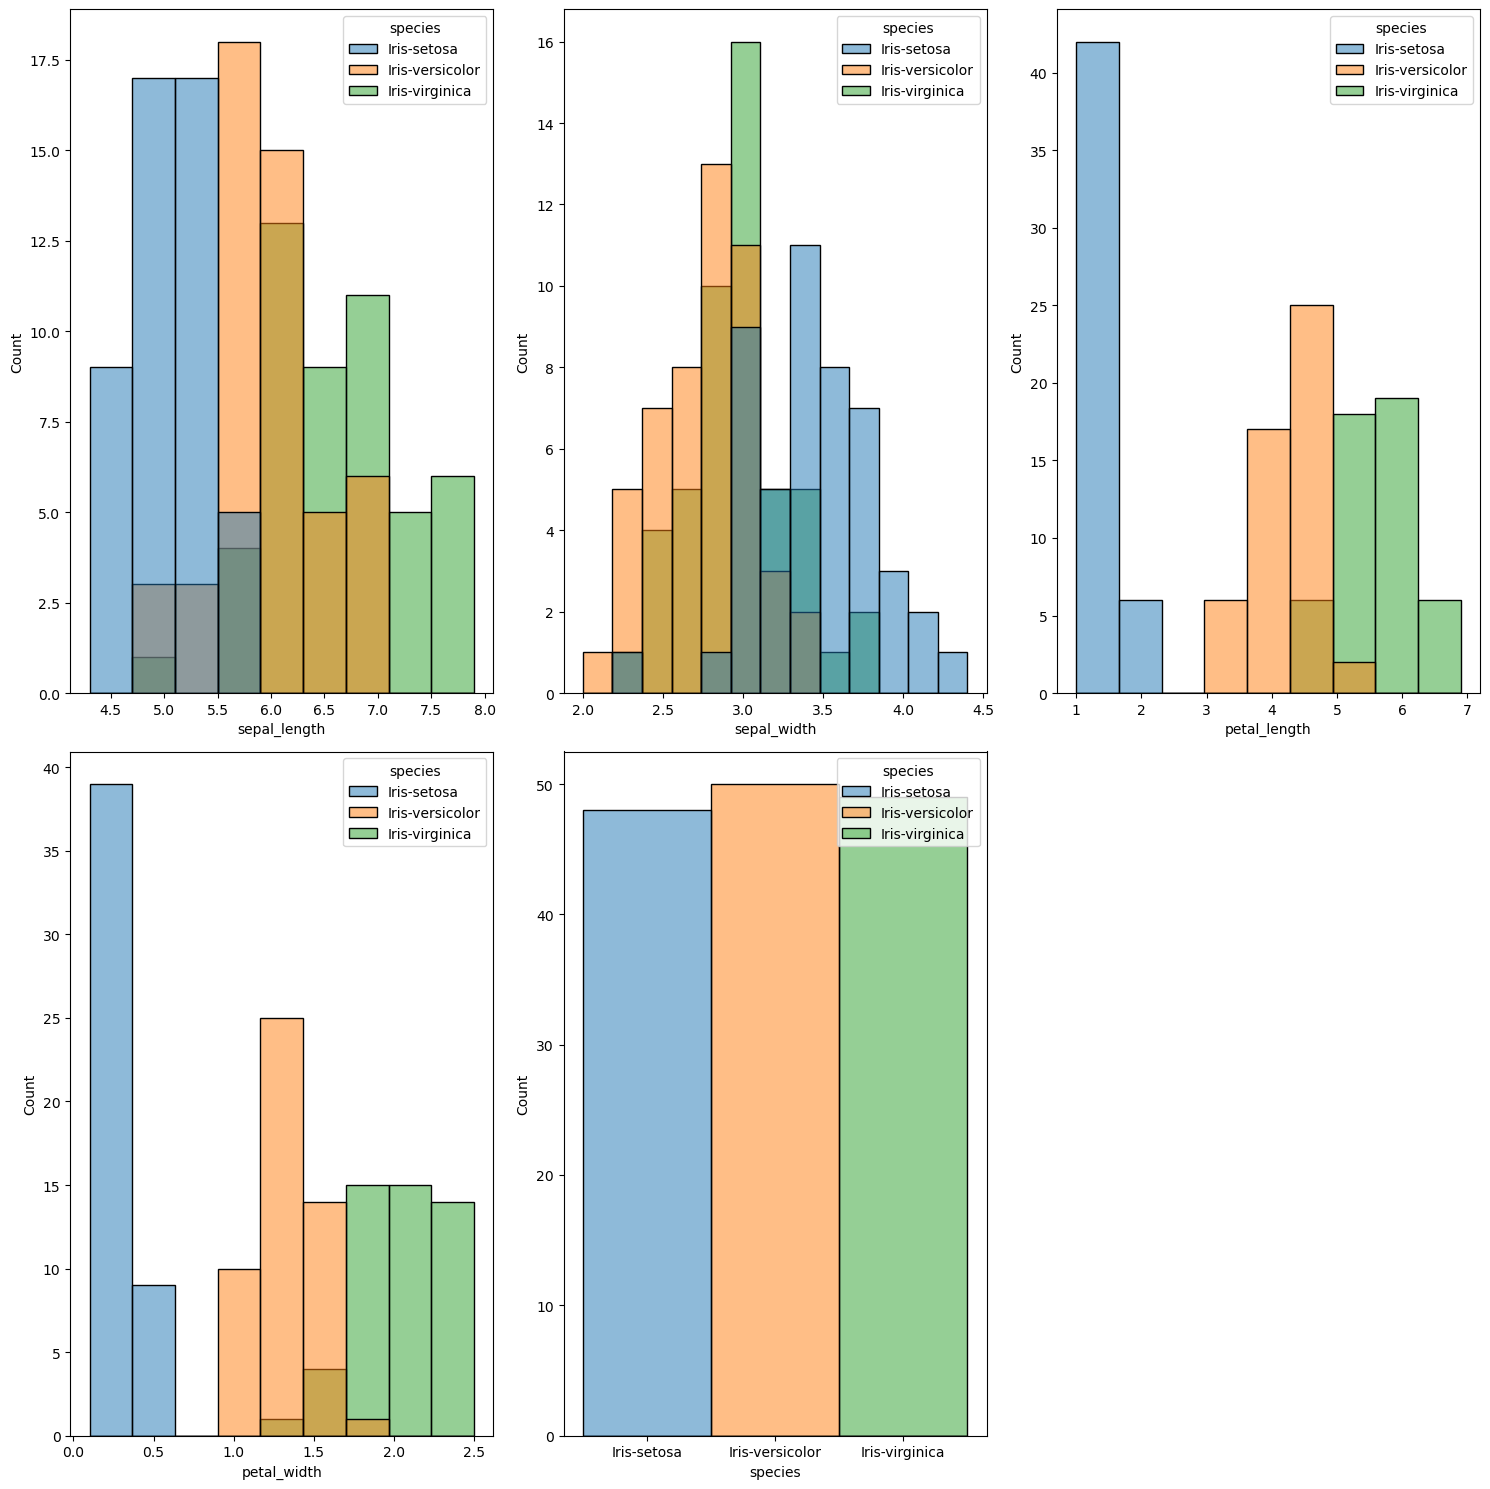

In [14]:
plt.figure(figsize=(15,15))
plotnumber=1 # initializing number of plots
for i in data:
    plt.subplot(2,3,plotnumber) # using subplot
    sns.histplot(x=i,data=data,hue=data.species,color="green") # plotting histplot
    plotnumber+=1 # increamentation
    plt.subplots_adjust(left=0.1, right=0.9,top=0.9,bottom=0.1)

plt.tight_layout()
plt.show()

## Observations:


## Multivariate analysis

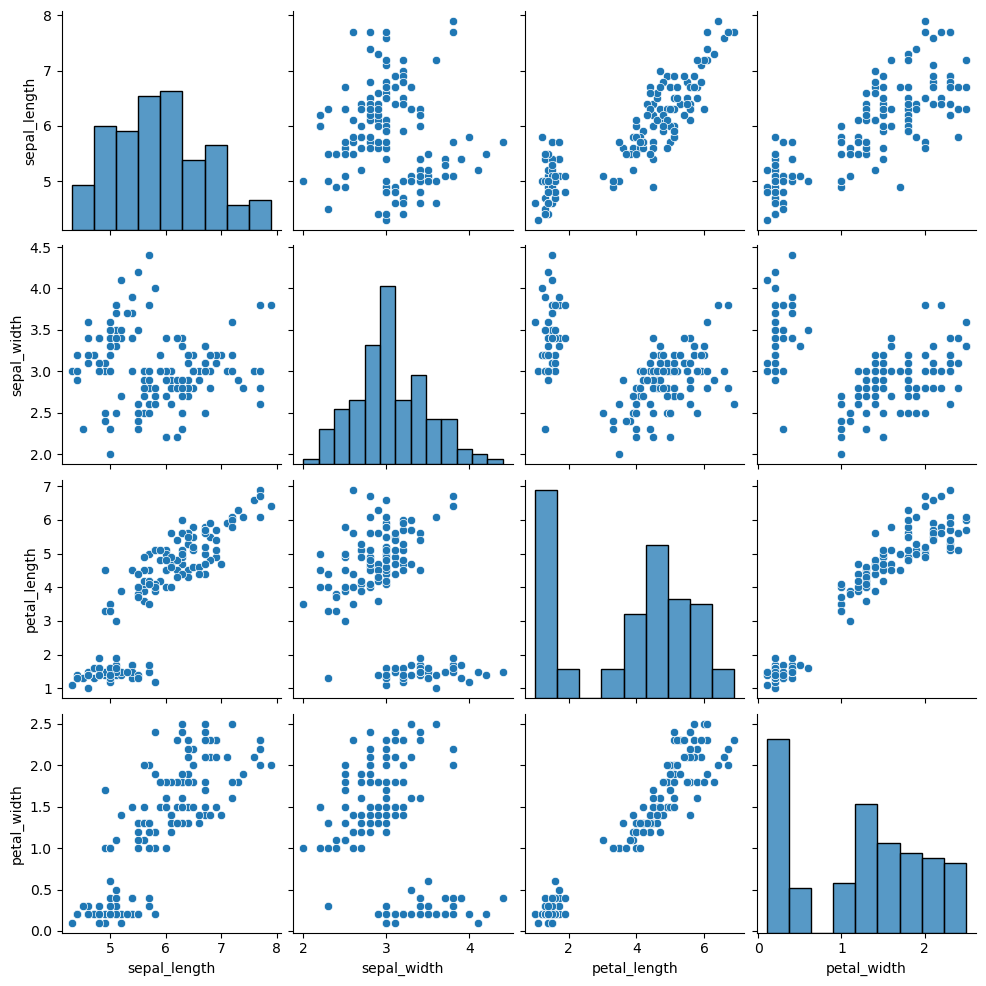

In [15]:
sns.pairplot(data) # using pairplot
plt.show()

## data preprocessing

In [16]:
# checking for null values
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

#### No null values present in dataset

## Encoding

In [17]:
data.dtypes


sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [18]:
data.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [19]:
data.species.value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: species, dtype: int64

In [20]:
# using replace to encoding
data["species"]=data.species.replace({"Iris-versicolor":2,"Iris-virginica":1,"Iris-setosa":0}) 

In [21]:
data.species.unique()

array([0, 2, 1], dtype=int64)

In [22]:
data.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Imputing outliers


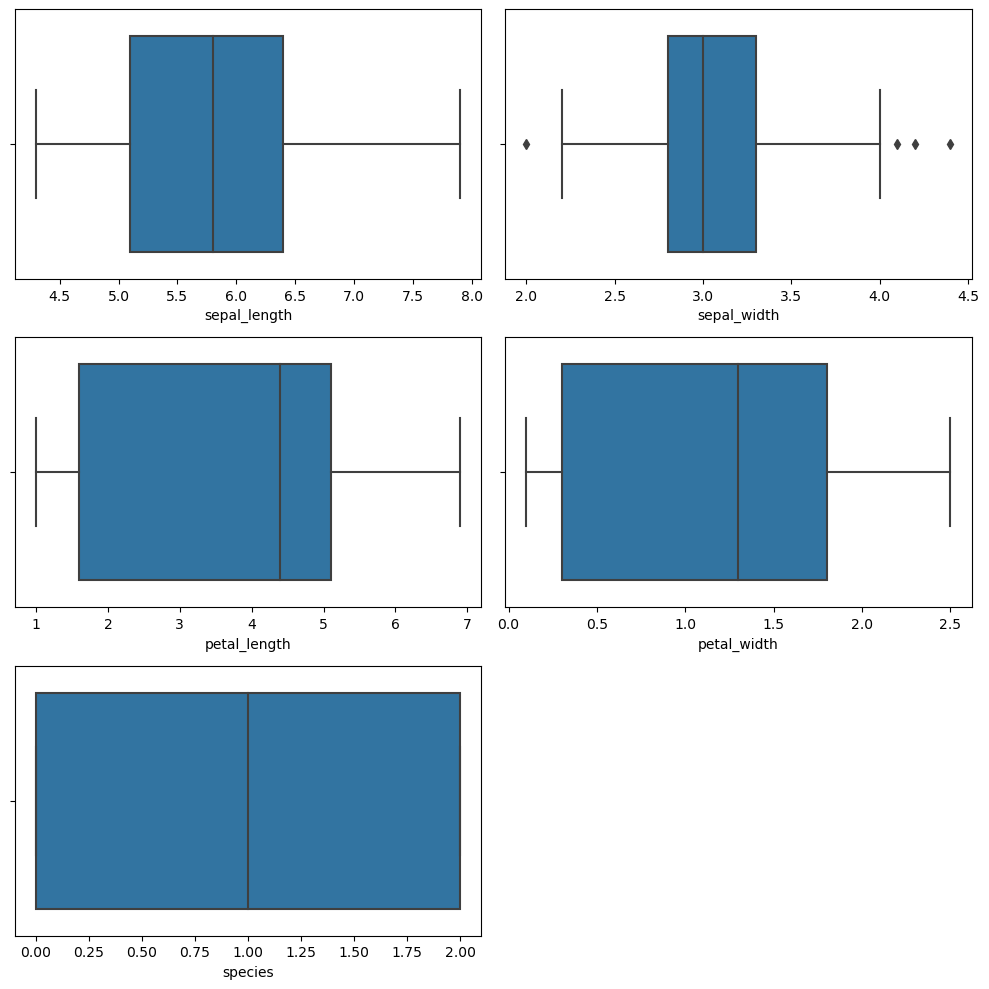

In [23]:
#Using boxplot to detect outliers
plt.figure(figsize=(10,10),facecolor='white')

plotnumber=1 # initialization of plotnumber

for column in data: # using for loop
        ax=plt.subplot(3,2,plotnumber) # subplot
        sns.boxplot(x = data[column]) 
        plotnumber+=1 # increamentation
plt.tight_layout() 

#### No need to handle outliers.

# Feature selection


## Checking correlation


In [24]:
data.corr()


,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109321,0.871305,0.817058,0.449648
sepal_width,-0.109321,1.000000,-0.421057,-0.356376,-0.618214
petal_length,0.871305,-0.421057,1.000000,0.961883,0.642808
petal_width,0.817058,-0.356376,0.961883,1.000000,0.572391
species,0.449648,-0.618214,0.642808,0.572391,1.000000


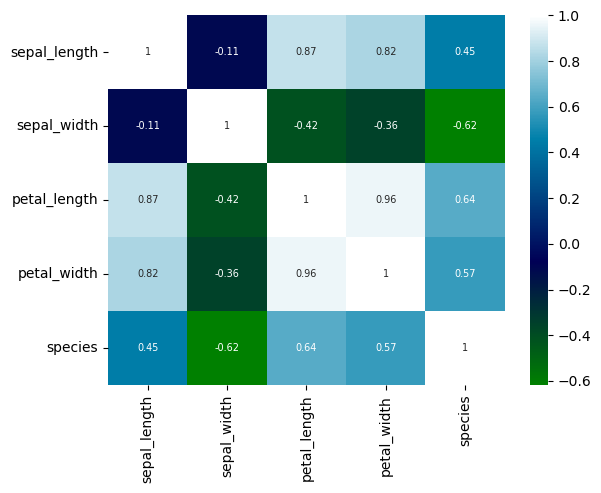

In [25]:
# using heatmap to visualize correlated columns
sns.heatmap(data.corr(),annot=True,cmap="ocean", annot_kws={"size":7})
plt.show()

In [26]:
def correlation(data,threshold):
    col_corr=set()
    corr_matrix=data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr   

In [27]:
corr_features=correlation(data,0.9)
len(set(corr_features))
print(corr_features)

{'petal_width'}


In [28]:
# dropping highly correlated feature
data.drop("petal_width",axis=1,inplace=True)

In [29]:
data.head()


,sepal_length,sepal_width,petal_length,species
0,5.1,3.5,1.4,0
1,4.9,3.0,1.4,0
2,4.7,3.2,1.3,0
3,4.6,3.1,1.5,0
4,5.0,3.6,1.4,0


## Selecting dependent and independent values

In [30]:
x=data.drop("species",axis=1) # independent features
y=data[["species"]] # dependent feature

In [31]:
x.head()


,sepal_length,sepal_width,petal_length
0,5.1,3.5,1.4
1,4.9,3.0,1.4
2,4.7,3.2,1.3
3,4.6,3.1,1.5
4,5.0,3.6,1.4


In [32]:
y.head()


,species
0,0
1,0
2,0
3,0
4,0


## Scaling of data

In [33]:
from sklearn.preprocessing import MinMaxScaler # using min max scaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x) # data transformation

## Splitting the data into train and test set

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=42) # splitting data into train and test set

## Balancing the target class using SMOTE


In [35]:
from imblearn.over_sampling import SMOTE # using SMOTE to balance
from collections import Counter
sm=SMOTE()
x_sm,y_sm=sm.fit_resample(x_train,y_train)

In [36]:
print(Counter(y_train))
print(Counter(y_sm)) # Balanced data

Counter({'species': 1})
Counter({'species': 1})


In [37]:
print("target class before balancing:",y_train.value_counts()) 
print("target class after balancing:",y_sm.value_counts())

target class before balancing: species
2          38
1          33
0          31
dtype: int64
target class after balancing: species
0          38
1          38
2          38
dtype: int64


## Model building


## Logistic Regression

### For testing


In [38]:
lr=LogisticRegression(multi_class="ovr")
lr.fit(x_sm,y_sm)
y_pred=lr.predict(x_test)
y_pred

array([1, 2, 1, 0, 2, 0, 1, 0, 1, 0, 0, 2, 1, 2, 1, 2, 0, 2, 1, 0, 0, 1,
       0, 1, 2, 0, 2, 1, 2, 0, 1, 0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 1, 2, 1,
       1], dtype=int64)

In [39]:
acc=accuracy_score(y_test,y_pred) 
acc

0.8888888888888888

In [40]:
# Printing classification report and confusion metrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[17  0  0]
 [ 0 14  2]
 [ 0  3  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.82      0.88      0.85        16
           2       0.82      0.75      0.78        12

    accuracy                           0.89        45
   macro avg       0.88      0.88      0.88        45
weighted avg       0.89      0.89      0.89        45



### For training

In [41]:
y_pred_train=lr.predict(x_sm)
acc_train=accuracy_score(y_sm,y_pred_train)
acc_train

0.8245614035087719

## SVM

### For testing


In [42]:
svc=SVC()
svc.fit(x_sm,y_sm)
y_pred1=svc.predict(x_test)

In [43]:
acc1=accuracy_score(y_test,y_pred1)
acc1

0.9333333333333333

### For training


In [44]:
y_pred_train1=svc.predict(x_sm)
acc_train1=accuracy_score(y_sm,y_pred_train1)
acc_train1

0.9736842105263158

In [45]:
# Printing classification report and confusion metrix

print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[17  0  0]
 [ 0 14  2]
 [ 0  1 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.93      0.88      0.90        16
           2       0.85      0.92      0.88        12

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



## Decision Tree


### For testing


In [46]:
dt=DecisionTreeClassifier()
dt.fit(x_sm,y_sm)
y_pred2=dt.predict(x_test)

In [47]:
acc2=accuracy_score(y_test,y_pred2)
acc2

0.9333333333333333

### For training


In [48]:
y_pred_train2=dt.predict(x_sm)
acc_train2=accuracy_score(y_sm,y_pred_train2)
acc_train2

1.0

In [49]:
# Printing classification report and confusion metrix

print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[17  0  0]
 [ 0 14  2]
 [ 0  1 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.93      0.88      0.90        16
           2       0.85      0.92      0.88        12

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



## Random Forest


### For testing


In [50]:
rf=RandomForestClassifier()
rf.fit(x_sm,y_sm)
y_pred3=rf.predict(x_test)

In [51]:
acc3=accuracy_score(y_test,y_pred3)
acc3

0.8888888888888888

### For training

In [52]:
y_pred_train3=rf.predict(x_sm)
acc_train3=accuracy_score(y_sm,y_pred_train3)
acc_train3

1.0

In [53]:
# Printing classification report and confusion metrix

print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[17  0  0]
 [ 0 12  4]
 [ 0  1 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.92      0.75      0.83        16
           2       0.73      0.92      0.81        12

    accuracy                           0.89        45
   macro avg       0.89      0.89      0.88        45
weighted avg       0.90      0.89      0.89        45



## Gradient Boosing


### For testing


In [54]:
gb=GradientBoostingClassifier()
gb.fit(x_sm,y_sm)
y_pred4=gb.predict(x_test)

In [55]:
acc4=accuracy_score(y_test,y_pred4)
acc4

0.9333333333333333

### For training


In [56]:
y_pred_train4=gb.predict(x_sm)
acc_train4=accuracy_score(y_sm,y_pred_train4)
acc_train4

1.0

In [57]:
# Printing classification report and confusion metrix

print(confusion_matrix(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

[[17  0  0]
 [ 0 14  2]
 [ 0  1 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.93      0.88      0.90        16
           2       0.85      0.92      0.88        12

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



## XGBoost


### For testing


In [58]:
xgb=XGBClassifier()
xgb.fit(x_sm,y_sm)
y_pred5=xgb.predict(x_test)

In [59]:
acc5=accuracy_score(y_test,y_pred5)
acc5

0.9111111111111111

### For Training


In [60]:
y_pred_train5=xgb.predict(x_sm)
acc_train5=accuracy_score(y_sm,y_pred_train5)
acc_train5

1.0

In [61]:
# Printing classification report and confusion metrix

print(confusion_matrix(y_test,y_pred5))
print(classification_report(y_test,y_pred5))

[[17  0  0]
 [ 0 13  3]
 [ 0  1 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.93      0.81      0.87        16
           2       0.79      0.92      0.85        12

    accuracy                           0.91        45
   macro avg       0.90      0.91      0.90        45
weighted avg       0.92      0.91      0.91        45



## Comparing all the results


In [62]:
dict={"Model":["logistic_regression","SVM","Decision Tree","Random Forest","Gradient boosting","XGBoost"],
    "Accuracy (train)":[acc_train,acc_train1,acc_train2,acc_train3,acc_train4,acc_train5],
     "Accuracy (test)":[acc,acc1,acc2,acc3,acc4,acc5]}

In [63]:
results=pd.DataFrame(dict)
results

,Model,Accuracy (train),Accuracy (test)
0,logistic_regression,0.824561,0.888889
1,SVM,0.973684,0.933333
2,Decision Tree,1.000000,0.933333
3,Random Forest,1.000000,0.888889
4,Gradient boosting,1.000000,0.933333
5,XGBoost,1.000000,0.911111


In [64]:
results.sort_values(by="Accuracy (test)")

,Model,Accuracy (train),Accuracy (test)
0,logistic_regression,0.824561,0.888889
3,Random Forest,1.000000,0.888889
5,XGBoost,1.000000,0.911111
1,SVM,0.973684,0.933333
2,Decision Tree,1.000000,0.933333
4,Gradient boosting,1.000000,0.933333


## Conclusion :


#### From the above table we can conclude that "Gradient Boosting algorithm" performs well on this dataset with highest Accuracy score.
#### so we can conclude that "Gradient Boosting algorithm" is best suited algorithm for this dataset